## Decision Trees

How a tree looks like? 

---

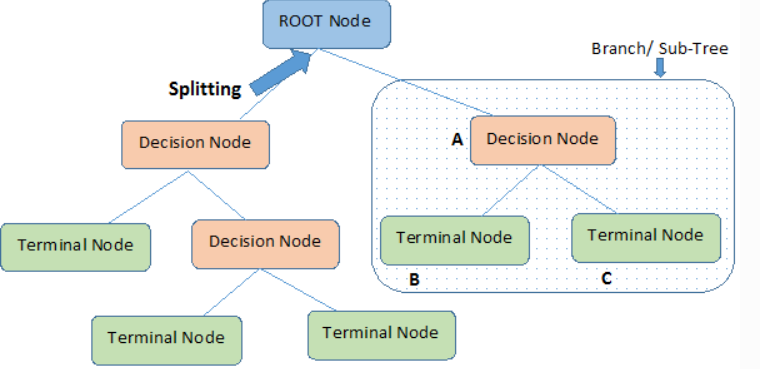

A **decision tree** is a classifier expressed as a recursive partition of the instance space. 

The decision tree consists of nodes that form a **rooted tree**,
meaning it is a directed tree with a node called **“root”** that has no incoming
edges. All other nodes have exactly one incoming edge. A node with outgoing
edges is called an **internal** or **test** node. All other nodes are called **leaves** (also
known as **terminal** or **decision nodes**). In a decision tree, each internal node
splits the instance space into two or more sub-spaces according to a certain
discrete function of the input attributes values. 

### Bias and Variance on Decision Tree ?

Strategy
- selects in favor of shorter trees over longer ones,
- selects trees that place the attributes with highest information gain closest to the root.

- Shorter trees are preferred over longer trees.
- Trees that place high information gain attributes close to the root are preferred over those that do not.


#### OCCAM'S RAZOR: Prefer the simplest hypothesis that fits the data.
- Fewer short hypotheses than long hypotheses
- A short hypothesis that fits the data is unlikely to be a coincidence
- A long hypothesis that fits the data might be a coincidence

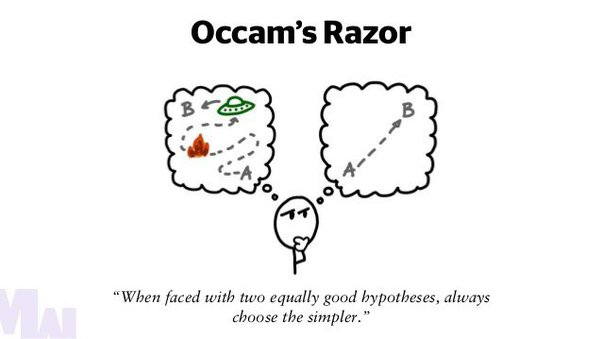

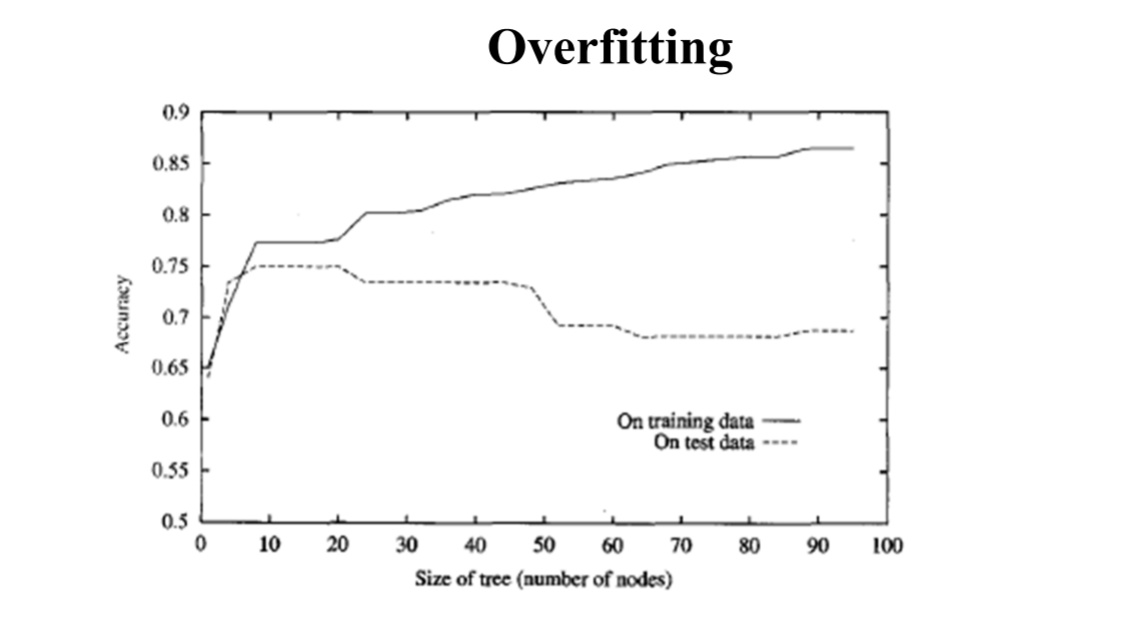

---

    Stop growing when data split not statistically significant
    - stop growing the tree earlier, before it reaches the point where it perfectly classifies the training data


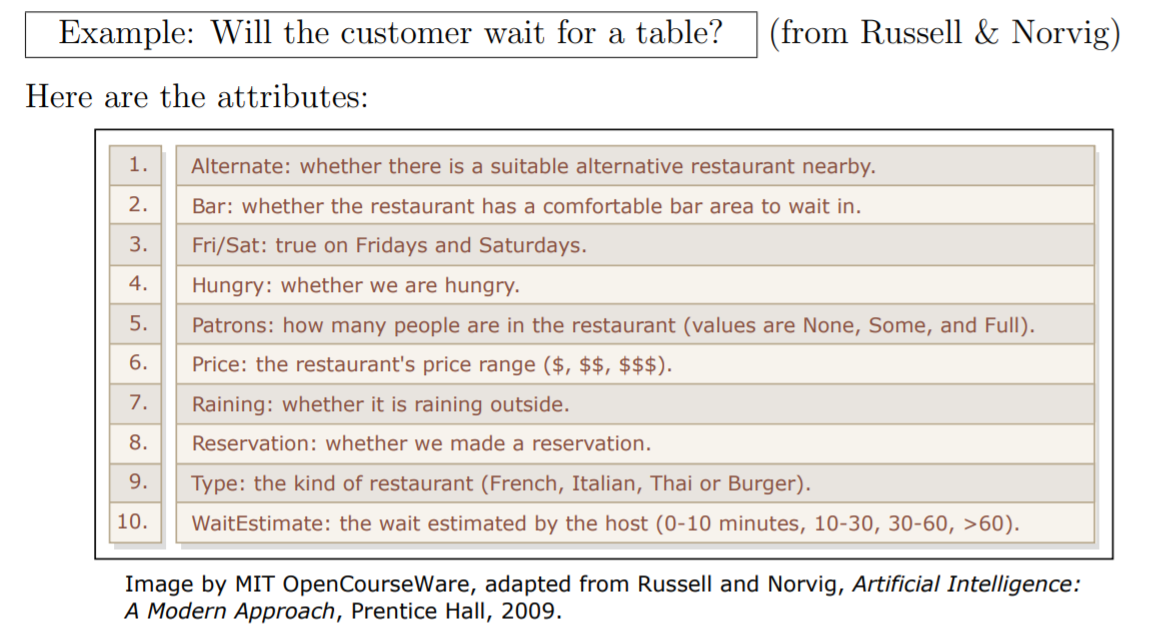

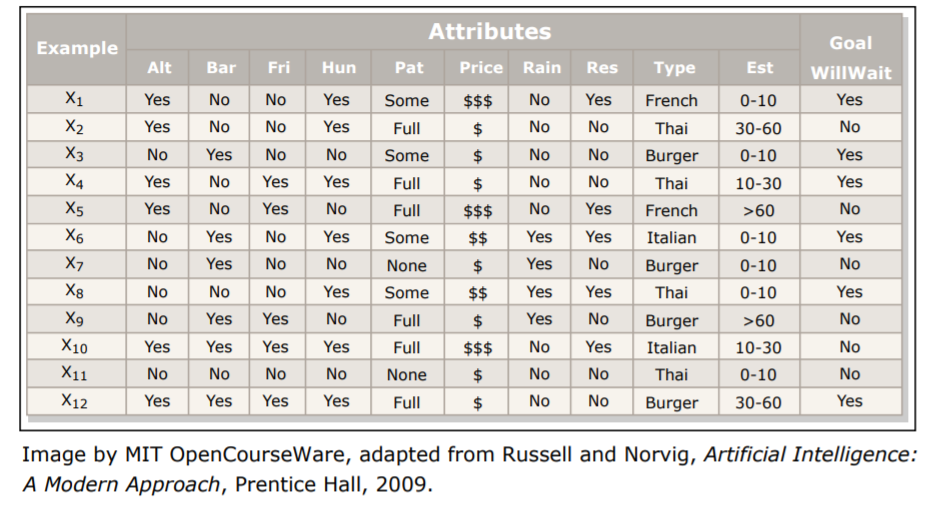

- Here are two options for the first feature to split at the top of the tree. Which one should we choose? Which one gives me the most information?

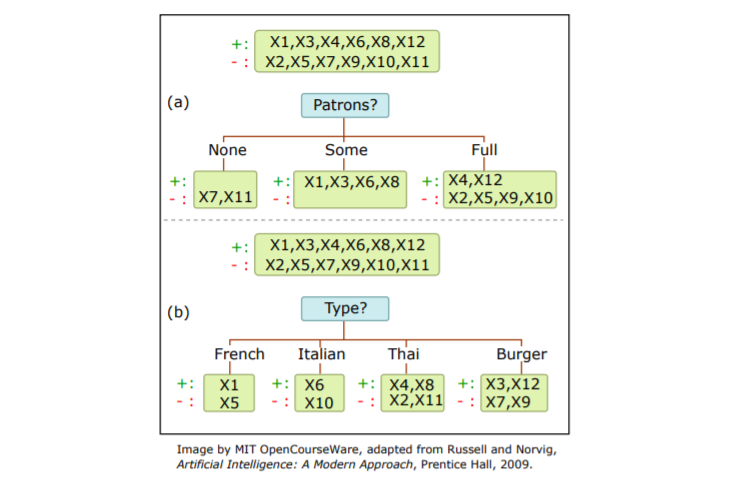

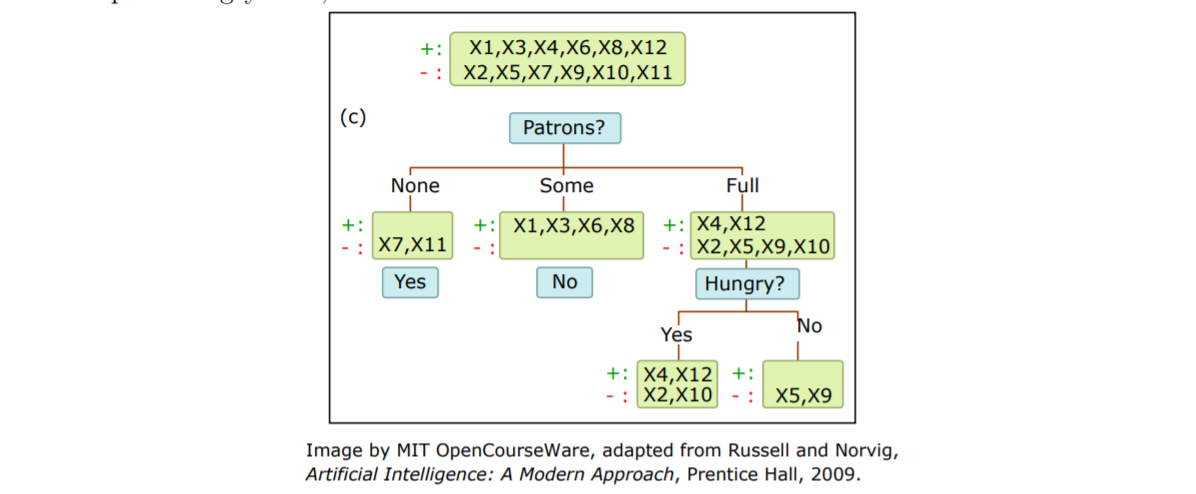

## Entropy

E.g., a coin flip from a fair coin contains 1 bit of information. If the event has
probability 1, we get no information from the occurrence of the event.

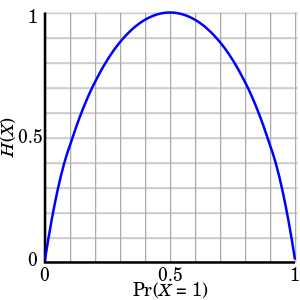

------------------

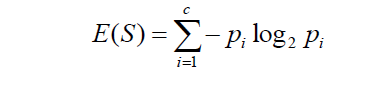


----------------

Day   | Weather | Just Ate | Late at Work | Will I go Running?
---   | ---     | ---      | ---          | ---
1     | 'Sunny' | 'yes'    | 'no'         | 'yes'
2     | 'Rainy' | 'yes'    | 'yes'        | 'no'
3     | 'Sunny' | 'no'     | 'yes'        | 'yes'
4     | 'Rainy' | 'no'     | 'no'         | 'no'
5     | 'Rainy' | 'no'     | 'no'         | 'yes'
6     | 'Sunny' | 'yes'    | 'no'         | 'yes'
7     | 'Rainy' | 'no'     | 'yes'        | 'no'

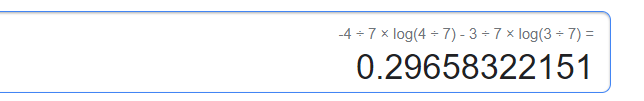

---

### Information Gain

entropy is a measure of the impurity in a collection of training examples

- information gain is a measure of the effectiveness of an attribute in classifying the training data.
- information gain measures the expected reduction in entropy by partitioning the examples according to an attribute.

---


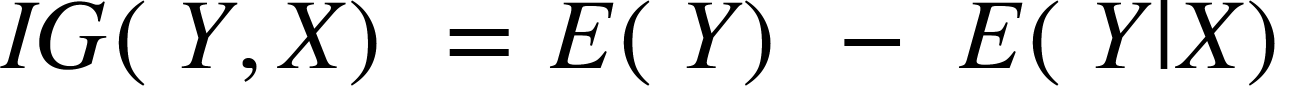

## Gini Impurity

"Will I Go Running" Data Set

Day   | Weather | Just Ate | Late at Work | Will I go Running?
---   | ---     | ---      | ---          | ---
1     | 'Sunny' | 'yes'    | 'no'         | 'yes'
2     | 'Rainy' | 'yes'    | 'yes'        | 'no'
3     | 'Sunny' | 'no'     | 'yes'        | 'yes'
4     | 'Rainy' | 'no'     | 'no'         | 'no'
5     | 'Rainy' | 'no'     | 'no'         | 'yes'
6     | 'Sunny' | 'yes'    | 'no'         | 'yes'
7     | 'Rainy' | 'no'     | 'yes'        | 'no'

- Gini Impurity is a measurement of the likelihood of an incorrect classification of a new instance of a random variable, if that new instance were randomly classified according to the distribution of class labels from the data set.

- Gini impurity is lower bounded by 0, with 0 occurring if the data set contains only one class.

The formula for calculating the gini impurity of a data set or feature is as follows:

        J(i=1)
G(k) =  Σ P(i) * (1 - P(i))  

Where P(i) is the probability of a certain classification i, per the training data set.

In the data set above, there are two classes in which data can be classified: “yes” (I will go running) and “no” (I will not go running).

If we were using the entire data set above as training data for a new decision tree (not enough data to train an accurate tree… but let’s roll with it) the gini impurity for the set would be calculated as follows:

G(will I go running) = P("yes") * 1 - P("yes") + P("no") * 1 - P("no")

G(will I go running) = 4 / 7 * (1 - 4/7) + 3 / 7 * 1 - P(3/7)

G(will I go running) = 0.489796

This means there is a **48.97%** chance of a new data point being incorrectly classified, based on the observed training data we have at our disposal. This number makes sense, since there are more yes class instances than no, so the probability of mis-classifying something is less than a coin flip (if we had the same number).

It seems that **gini impurity** and **entropy** are often interchanged in the construction of decision trees. Neither metric results in a more accurate tree than the other.

#### Gain Ratio
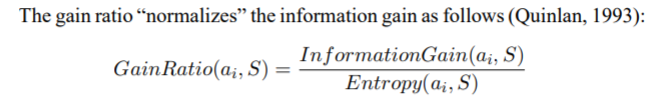

Note that this ratio is not defined when the denominator is zero. Also the ratio
may tend to favor attributes for which the denominator is very small. 

Consequently, it is suggested in two stages. 
- First the information gain is calculated for all attributes. 
- As a consequence, taking into consideration only attributes that have performed at least as good as the average information gain, the attribute that has obtained the best ratio gain is selected.


It has been shown that the **gain ratio** tends to outperform simple **information gain criteria**, both from the **accuracy aspect**, as well as from classifier **complexity aspects**

### Stopping Criteria
The growing phase continues until a stopping criterion is triggered. The
following conditions are common stopping rules:
1. All instances in the training set belong to a single value of y.
2. The maximum tree depth has been reached.
3. The number of cases in the terminal node is less than the minimum number of cases for parent nodes.
4. If the node were split, the number of cases in one or more child nodes
would be less than the minimum number of cases for child nodes.
5. The best splitting criteria is not greater than a certain threshold.

### How split looks like on data

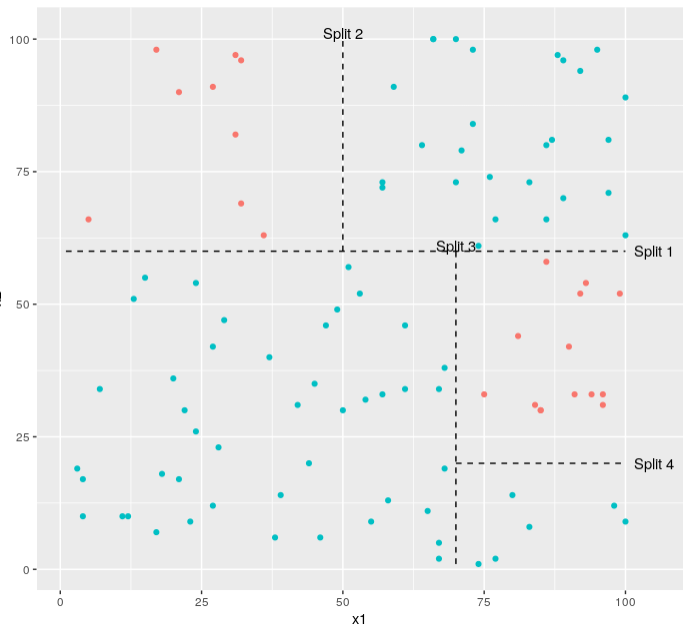


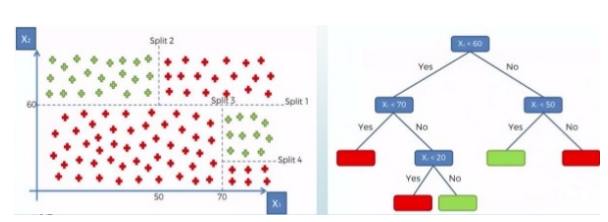

#### Some Advantages

- Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
- A decision tree does not require normalization of data.
- A decision tree does not require scaling of data as well.
- Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.
- A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.

#### Some Disadvantages
- A small change in the data can cause a large change in the structure of the decision tree causing instability.
- For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
- Decision tree often involves higher time to train the model.
- Decision tree training is relatively expensive as the complexity and time has taken are more.
- The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.

In [12]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib as plt

### Decision Tree Classifier with criterion gini index

In [6]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

clf_gini = tree.DecisionTreeClassifier(criterion='gini')
clf_gini = clf_gini.fit(X_train, y_train)

In [7]:
y_pred_gini = clf_gini.predict(X_test)

In [8]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9600


In [9]:
y_pred_train_gini = clf_gini.predict(X_train)

In [10]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9600


In [13]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

AttributeError: module 'matplotlib' has no attribute 'figure'

### Decision Tree Classifier with criterion entropy

In [82]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [83]:
y_pred_en = clf_en.predict(X_test)

In [84]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9800


In [85]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 2, 1, 2,
       2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2])

In [86]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9700


In [87]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9700
Test set score: 0.9800


[Text(0.375, 0.875, 'X[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.25, 0.375, 'X[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.125, 0.125, 'entropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\nentropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(0.625, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

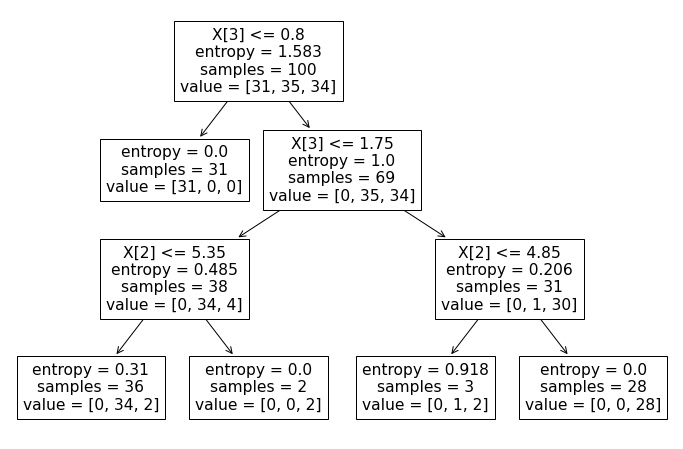

In [88]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

##### Refs
https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8

https://www.ise.bgu.ac.il/faculty/liorr/hbchap9.pdf

https://web.cs.hacettepe.edu.tr/~ilyas/Courses/BIL712/lec02-DecisionTree.pdf